In [7]:
using MAT
using WebIO
using PyCall
using PyPlot
using Eirene
using Random
using Statistics
using Glob
using DelimitedFiles

rng = MersenneTwister(1337);

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10091921421334828144\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13222427829004843245\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10091921421334828144\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


#### TODO (WZ):
- For each simulation condition (clustered, spanning and individual) at steady state (time-step 150,000) compute changes in Wasserstein distance after randomly removing points (similar to code below). Consider separately Wasserstein distance for $H_0$ and $H_0 + H_1$. Each simulation (in `simulation-data` directory) consists of 200 cells. 

In [130]:
#for clustered
#change to dictionary of string to data DONE clean code do h0 take in string and time step
filecluster = glob("Pos_*.dat","simulation-data/clustered")
clusterfilenum = [];
clusterpos = [];
sz = size(filecluster)[1];
for i in 1:sz
    filenamewext = split(filecluster[i], '/')[3];
    filename = split(filenamewext, '.')[1];
    filenum = parse(Int, split(filename, '_')[2]);
    posarray = readdlm(filecluster[i], ',', '\n');
    posx = [];
    posy = []
    for j in 1:size(posarray)[2]
        posarray[j] = chop(posarray[j]);
        xsign = 1;
        x_y = split(posarray[j], '-');
        if(x_y[1] == "")
            xsign = -1;
            x_y = deleteat!(x_y,1);
        end
        x_plus_y = [];
        if(size(x_y)[1] == 1)
            x_plus_y = split(posarray[j], '+');
            x_plus_y = map(a->parse(Float64,a),x_plus_y);
            push!(posx, x_plus_y[1]);
            push!(posy, x_plus_y[2]);
        else
            x_y = map(a->parse(Float64,a),x_y);
            x_y[1] *= xsign;
            x_y[2] *= -1;
            push!(posx,x_y[1]);
            push!(posy,x_y[2]);
        end
    end
    push!(clusterpos, transpose(hcat(posx, posy)));
    push!(clusterfilenum, filenum);
    
end

#for spanning
filespan = glob("Pos_*.dat","simulation-data/spanning")
spanfilenum = [];
spanpos = [];
for i in 1:sz
    filenamewext = split(filespan[i], '/')[3];
    filename = split(filenamewext, '.')[1];
    filenum = parse(Int, split(filename, '_')[2]);
    posarray = readdlm(filespan[i], ',', '\n');
    posx = [];
    posy = []
    for j in 1:size(posarray)[2]
        posarray[j] = chop(posarray[j]);
        xsign = 1;
        x_y = split(posarray[j], '-');
        if(x_y[1] == "")
            xsign = -1;
            x_y = deleteat!(x_y,1);
        end
        x_plus_y = [];
        if(size(x_y)[1] == 1)
            x_plus_y = split(posarray[j], '+');
            x_plus_y = map(a->parse(Float64,a),x_plus_y);
            push!(posx, x_plus_y[1]);
            push!(posy, x_plus_y[2]);
        else
            x_y = map(a->parse(Float64,a),x_y);
            x_y[1] *= xsign;
            x_y[2] *= -1;
            push!(posx,x_y[1]);
            push!(posy,x_y[2]);
        end
    end
    push!(spanpos, transpose(hcat(posx, posy)));
    push!(spanfilenum, filenum);
    
end


#for individual
fileindiv = glob("Pos_*.dat","simulation-data/individual")
indivfilenum = [];
indivpos = [];
for i in 1:sz
    filenamewext = split(fileindiv[i], '/')[3];
    filename = split(filenamewext, '.')[1];
    filenum = parse(Int, split(filename, '_')[2]);
    posarray = readdlm(fileindiv[i], ',', '\n');
    posx = [];
    posy = []
    for j in 1:size(posarray)[2]
        posarray[j] = chop(posarray[j]);
        xsign = 1;
        x_y = split(posarray[j], '-');
        if(x_y[1] == "")
            xsign = -1;
            x_y = deleteat!(x_y,1);
        end
        x_plus_y = [];
        if(size(x_y)[1] == 1)
            x_plus_y = split(posarray[j], '+');
            x_plus_y = map(a->parse(Float64,a),x_plus_y);
            push!(posx, x_plus_y[1]);
            push!(posy, x_plus_y[2]);
        else
            x_y = map(a->parse(Float64,a),x_y);
            x_y[1] *= xsign;
            x_y[2] *= -1;
            push!(posx,x_y[1]);
            push!(posy,x_y[2]);
        end
    end
    push!(indivpos, transpose(hcat(posx, posy)));
    push!(indivfilenum, filenum);
end


In [19]:
#create function to take create dictionary to data for each condition type
function getdata(condition)
    filelist = glob("Pos_*.dat",string("simulation-data/", condition));
    filetodata = Dict{String, Array{Float64,2}}();
    sz = size(filelist)[1];
    for i in 1:sz
        filenamewext = split(filelist[i], '/')[3];
        filename = split(filenamewext, '.')[1];
        filenum = parse(Int, split(filename, '_')[2]);
        posarray = readdlm(filelist[i], ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            posarray[j] = chop(posarray[j]);
            xsign = 1;
            x_y = split(posarray[j], '-');
            if(x_y[1] == "")
                xsign = -1;
                x_y = deleteat!(x_y,1);
            end
            x_plus_y = [];
            if(size(x_y)[1] == 1)
                x_plus_y = split(posarray[j], '+');
                x_plus_y = map(a->parse(Float64,a),x_plus_y);
                push!(posx, x_plus_y[1]);
                push!(posy, x_plus_y[2]);
            else
                x_y = map(a->parse(Float64,a),x_y);
                x_y[1] *= xsign;
                x_y[2] *= -1;
                push!(posx,x_y[1]);
                push!(posy,x_y[2]);
            end
        end
        positions = transpose(hcat(posx, posy));    
        push!(filetodata, filename => positions)
    end
    return filetodata;
end


getdata (generic function with 1 method)

In [54]:
function wassersteinremoval(condition, filename, maxdimension,num_removals,num_reps, dictdata = nothing)
    conditiondict = Dict{String, Array{Float64,2}}();
    if(dictdata == nothing)
        conditiondict = getdata(condition);
    else
        conditiondict = dictdata;
    end
    pers_diag = eirene(conditiondict[filename], model="pc", maxdim=maxdimension)
    barcodedata = barcode(pers_diag)
    barcode_coord_vals = sort(unique(collect(Iterators.flatten(barcodedata))))
    max_coord = maximum(barcode_coord_vals)

    # if max value is Inf, normalize by second largest values
    if max_coord == Inf
        max_coord = barcode_coord_vals[end-1]
    end

    @assert max_coord != Inf

    # replace Inf values
    replace!(barcodedata, Inf=>max_coord)
    num_particles = size(conditiondict[filename])[2]
    wasserstein_distances = Array{Float64}(undef, num_removals, num_reps);

    for i in 1:num_removals
        for j in 1:num_reps
            permutation = randperm(rng, num_particles)
            keep_idx = permutation[1:(num_particles-i)]
            finalpos = conditiondict[filename];
            pos_tmp = finalpos[:,keep_idx]
            pers_diag_tmp = eirene(pos_tmp, model="pc", maxdim=1)
            barcode_tmp = barcode(pers_diag_tmp)
            wasserstein_distances[i, j] = wasserstein_distance(barcode_tmp, barcodedata, q=2, p=2)
        end
    end
    return wasserstein_distances
end

wassersteinremoval (generic function with 2 methods)

In [30]:
clusterlasttime = wassersteinremoval("clustered", "Pos_150000",1,100,3)
spanlasttime = wassersteinremoval("spanning", "Pos_150000",1,100,3)
indivlasttime = wassersteinremoval("individual", "Pos_150000",1,100,3)

100×3 Array{Float64,2}:
 0.366564  0.0       0.615493 
 0.456964  0.122288  0.43433  
 0.348249  0.119703  0.0344072
 0.567504  0.91356   0.473662 
 0.654083  0.767721  0.458335 
 1.08577   0.718916  0.0306065
 0.380338  1.04451   0.835047 
 0.500109  0.557889  1.25666  
 0.63734   0.653295  0.955569 
 0.593565  0.744306  1.05713  
 0.774019  0.436602  0.531489 
 1.25274   1.12684   0.981079 
 0.963104  1.13623   0.784822 
 ⋮                            
 2.1623    2.71944   2.10633  
 2.96204   2.07564   2.15144  
 2.42307   2.20505   2.39607  
 2.03569   2.30143   2.18261  
 2.04763   2.2593    2.54922  
 2.11497   3.25018   2.38533  
 2.15931   2.82495   2.49533  
 2.00998   2.77983   2.516    
 2.8449    2.63703   2.96756  
 2.08269   2.62795   2.05636  
 2.36225   2.1305    2.24013  
 2.34942   2.75723   2.79153  

In [61]:
function gettotalwasserstein(condition,dimension, num_removal, num_repetition)
    data = getdata(condition);
    wasserstein_all_time = Dict{String, Array{Float64,2}}();
    for (key,value) in data;
        wasserstein_distances = wassersteinremoval(condition,key,dimension,num_removal, num_repetition, data);
        push!(wasserstein_all_time, key=>wasserstein_distances);
    end
    return wasserstein_all_time
end



gettotalwasserstein (generic function with 1 method)

In [85]:
function plotwasserstein(condition, dimension, num_removal, num_repetition)
    data = getdata(condition);
    wassersteins = gettotalwasserstein(condition, dimension, num_removal, num_repetition)
    figure(figsize=(8,4))
    for (key,value) in wassersteins
        mean_ws_dist = mean(value, dims=2);
        std_ws_dist = std(value, dims=2);
        xs = convert(Array, 1:num_removal)
        lb = collect(Iterators.flatten(convert(Array,mean_ws_dist-std_ws_dist)))
        ub = collect(Iterators.flatten(convert(Array, mean_ws_dist+std_ws_dist)))

        
        plot(1:num_removal, mean_ws_dist, label=string(key,", n = ",size(data[key])[2]))
        ax = gca()
        fill_between(xs, lb, ub, alpha=0.2)
        
    end
    xlabel("Number of removals")
    ylabel("Wasserstein distance")
    title(string(uppercase(condition[1]),condition[2:end]," Data and Wasserstein and Removals"))
    legend();
end

plotwasserstein (generic function with 1 method)

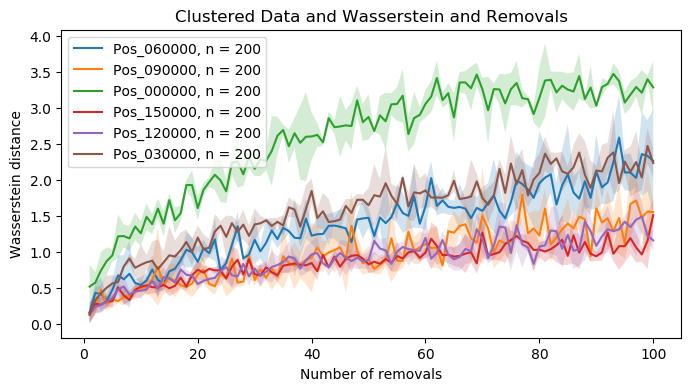

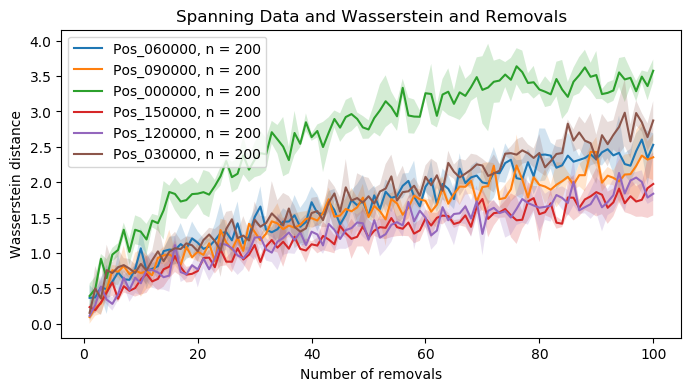

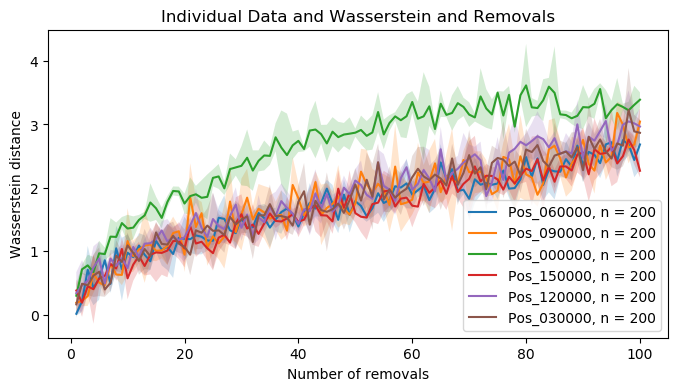

PyObject <matplotlib.legend.Legend object at 0x0000000001995588>

In [89]:
plotwasserstein("clustered",1, 100,3)
plotwasserstein("spanning",1,100,3)
plotwasserstein("individual",1,100,3)

In [96]:
function plottogether(timestep, dim, num_removal,num_repetition)
    conditions = ["clustered", "spanning","individual"];
    figure(figsize=(8,4))
    for conditionstring in conditions
        data = getdata(conditionstring)
        lastwass = wassersteinremoval(conditionstring, timestep, dim,num_removal,num_repetition)
        mean_ws_dist = mean(lastwass, dims=2);
        std_ws_dist = std(lastwass, dims=2);
        xs = convert(Array, 1:num_removal)
        lb = collect(Iterators.flatten(convert(Array,mean_ws_dist-std_ws_dist)))
        ub = collect(Iterators.flatten(convert(Array, mean_ws_dist+std_ws_dist)))


        plot(1:100, mean_ws_dist, label=string(string(uppercase(conditions[1]),conditions[2:end]),", n = ",size(data[timestep])[2]))
        ax = gca()
        fill_between(xs, lb, ub, alpha=0.2)
    end
    xlabel("Number of removals")
    ylabel("Wasserstein distance")
    title(string("Time-step ",split(timestep,"_")[end] ,"Data and Wasserstein and Removals"))
    legend();
end

plottogether (generic function with 1 method)

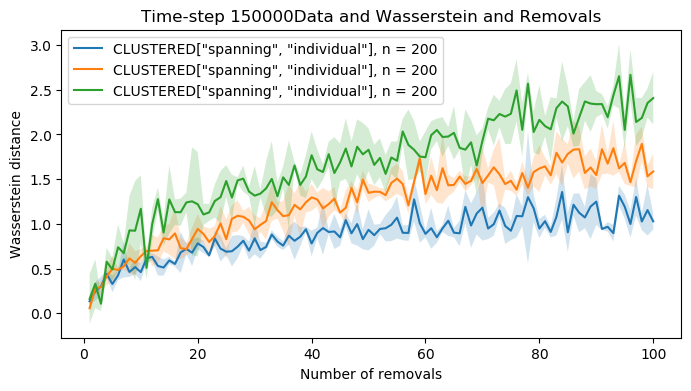

PyObject <matplotlib.legend.Legend object at 0x000000003F0F7A20>

In [97]:
plottogether("Pos_150000",1,100,3)

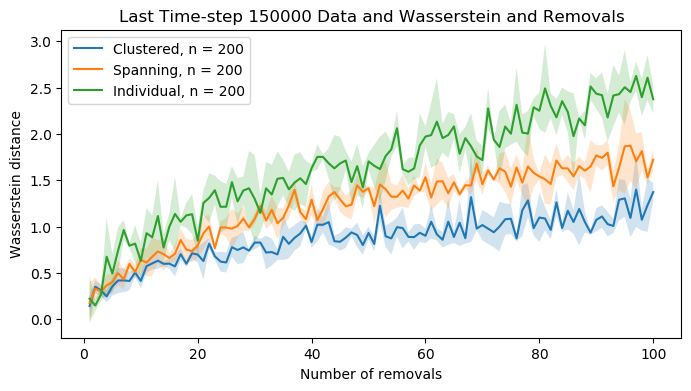

In [133]:
#clusternormalize
for i in 1:sz
    barcode_coord_vals = sort(unique(collect(Iterators.flatten(clusterbarcodes[i]))))
    max_coord = maximum(barcode_coord_vals)

    # if max value is Inf, normalize by second largest values
    if max_coord == Inf
        max_coord = barcode_coord_vals[end-1]
    end

    @assert max_coord != Inf

    # replace Inf values
    replace!(clusterbarcodes[i], Inf=>max_coord)
end


#spannormalize
for i in 1:sz
    barcode_coord_vals = sort(unique(collect(Iterators.flatten(spanbarcodes[i]))))
    max_coord = maximum(barcode_coord_vals)

    # if max value is Inf, normalize by second largest values
    if max_coord == Inf
        max_coord = barcode_coord_vals[end-1]
    end

    @assert max_coord != Inf

    # replace Inf values
    replace!(spanbarcodes[i], Inf=>max_coord)
end


#indivnormalize
for i in 1:sz
    barcode_coord_vals = sort(unique(collect(Iterators.flatten(indivbarcodes[i]))))
    max_coord = maximum(barcode_coord_vals)

    # if max value is Inf, normalize by second largest values
    if max_coord == Inf
        max_coord = barcode_coord_vals[end-1]
    end

    @assert max_coord != Inf

    # replace Inf values
    replace!(indivbarcodes[i], Inf=>max_coord)
end

In [153]:
num_removals = 100
num_reps = 3
#cluster
clusterwasserstein = [];
cmeanarray = [];
cstdarray = [];
for m in 1:sz
    num_particles = size(clusterpos[m])[2]
    wasserstein_distances = Array{Float64}(undef, num_removals, num_reps);

    for i in 1:num_removals
        for j in 1:num_reps
            permutation = randperm(rng, num_particles)
            keep_idx = permutation[1:(num_particles-i)]
            finalpos = clusterpos[m];
            pos_tmp = finalpos[:,keep_idx]
            pers_diag_tmp = eirene(pos_tmp, model="pc", maxdim=1)
            barcode_tmp = barcode(pers_diag_tmp)
            wasserstein_distances[i, j] = wasserstein_distance(barcode_tmp, clusterbarcodes[m], q=2, p=2)
        end
    end
    mean_ws_dist = mean(wasserstein_distances, dims=2);
    std_ws_dist = std(wasserstein_distances, dims=2);
    push!(clusterwasserstein, wasserstein_distances);
    push!(cmeanarray, mean_ws_dist);
    push!(cstdarray, std_ws_dist);
end
#span
spanwasserstein = [];
smeanarray = [];
sstdarray = [];
for m in 1:sz
    num_particles = size(spanpos[m])[2]

    wasserstein_distances = Array{Float64}(undef, num_removals, num_reps);

    for i in 1:num_removals
        for j in 1:num_reps
            permutation = randperm(rng, num_particles)
            keep_idx = permutation[1:(num_particles-i)]
            finalpos = spanpos[m]
            pos_tmp = finalpos[:,keep_idx]
            pers_diag_tmp = eirene(pos_tmp, model="pc", maxdim=1)
            barcode_tmp = barcode(pers_diag_tmp)
            wasserstein_distances[i, j] = wasserstein_distance(barcode_tmp, spanbarcodes[m], q=2, p=2)
        end
    end
    mean_ws_dist = mean(wasserstein_distances, dims=2);
    std_ws_dist = std(wasserstein_distances, dims=2);
    push!(spanwasserstein, wasserstein_distances);
    push!(smeanarray, mean_ws_dist);
    push!(sstdarray, std_ws_dist);
end
#indiv
indivwasserstein = [];
imeanarray = [];
istdarray = [];
for m in 1:sz
    num_particles = size(indivpos[m])[2]

    wasserstein_distances = Array{Float64}(undef, num_removals, num_reps);

    for i in 1:num_removals
        for j in 1:num_reps
            permutation = randperm(rng, num_particles)
            keep_idx = permutation[1:(num_particles-i)]
            finalpos = indivpos[m]
            pos_tmp = finalpos[:,keep_idx]
            pers_diag_tmp = eirene(pos_tmp, model="pc", maxdim=1)
            barcode_tmp = barcode(pers_diag_tmp)
            wasserstein_distances[i, j] = wasserstein_distance(barcode_tmp, indivbarcodes[m], q=2, p=2)
        end
    end
    mean_ws_dist = mean(wasserstein_distances, dims=2);
    std_ws_dist = std(wasserstein_distances, dims=2);
    push!(indivwasserstein, wasserstein_distances);
    push!(imeanarray, mean_ws_dist);
    push!(istdarray, std_ws_dist);
end


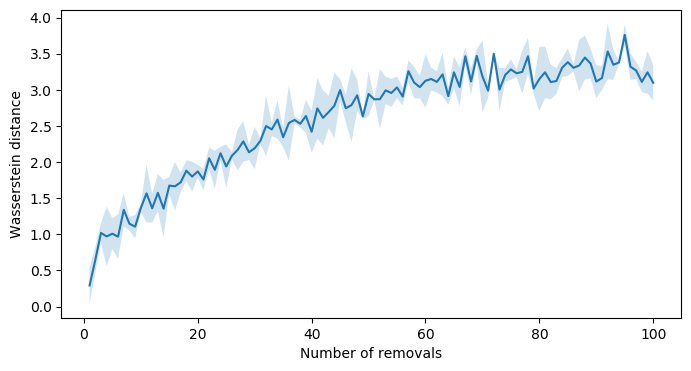

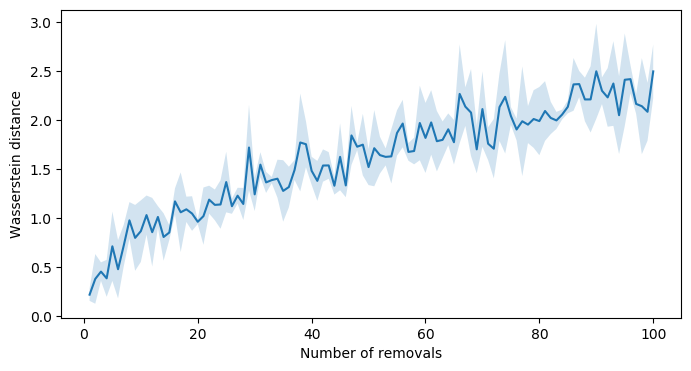

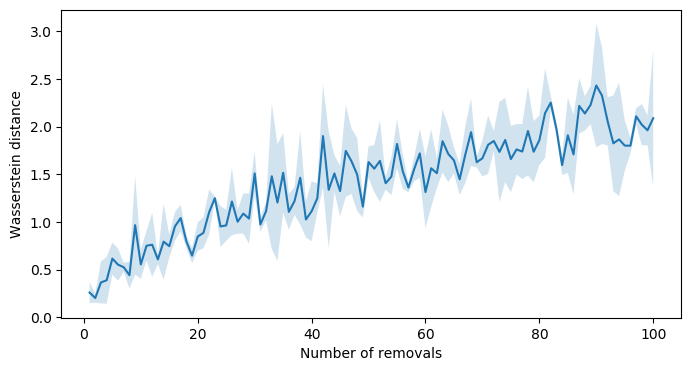

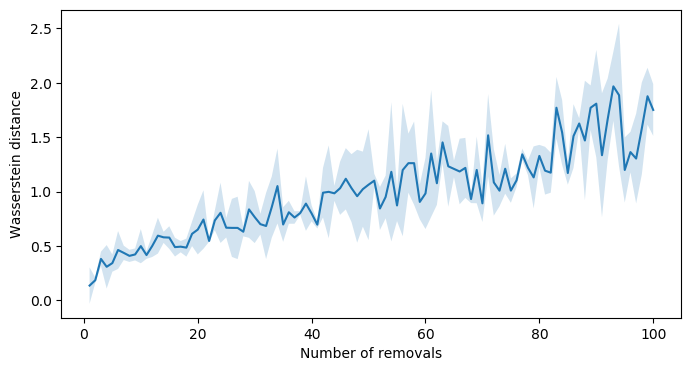

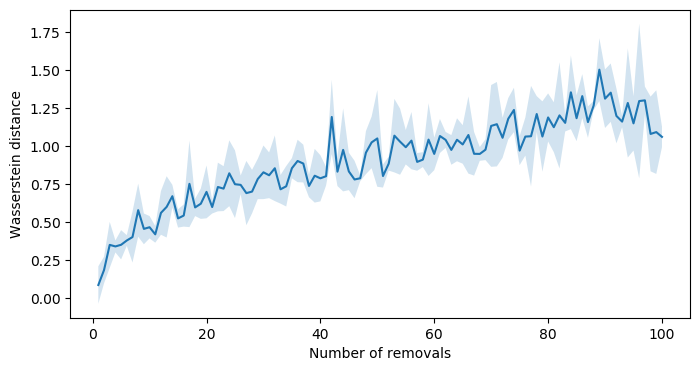

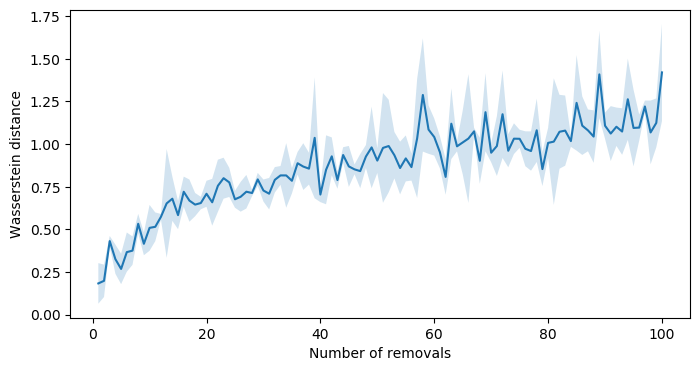

In [154]:
#clust
for i in 1:sz
    xs = convert(Array, 1:num_removals)
    lb = collect(Iterators.flatten(convert(Array, cmeanarray[i]-cstdarray[i])))
    ub = collect(Iterators.flatten(convert(Array, cmeanarray[i]+cstdarray[i])))

    figure(figsize=(8,4))
    plot(1:num_removals, cmeanarray[i])
    ax = gca()
    fill_between(xs, lb, ub, alpha=0.2)
    xlabel("Number of removals")
    ylabel("Wasserstein distance")
end

#add title to plot and make final timestep plot combining all together

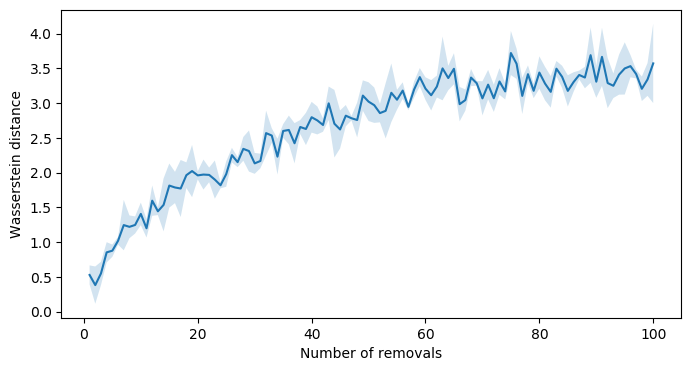

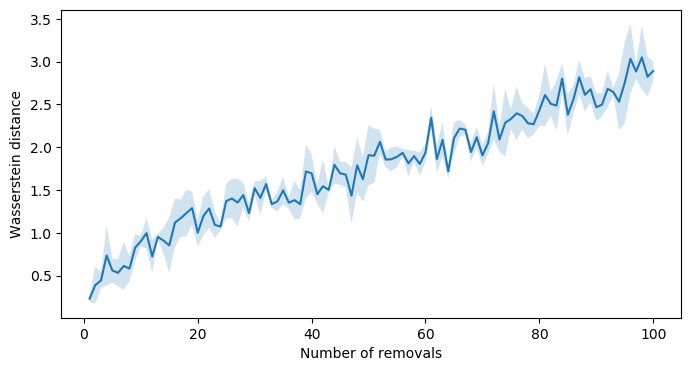

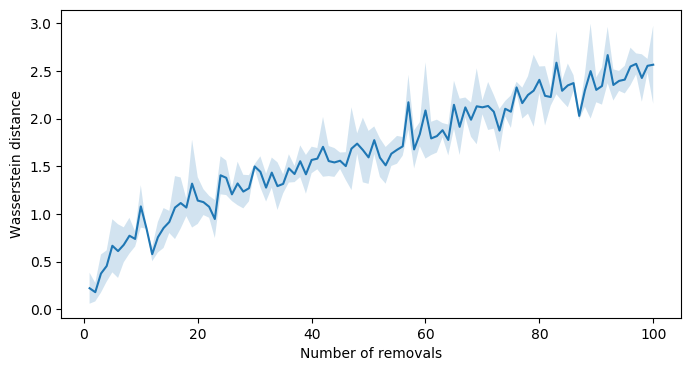

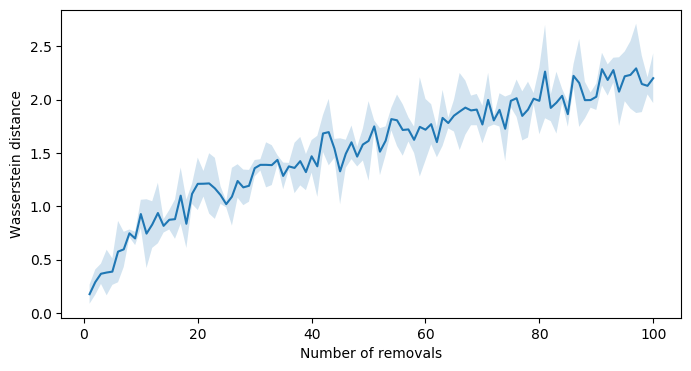

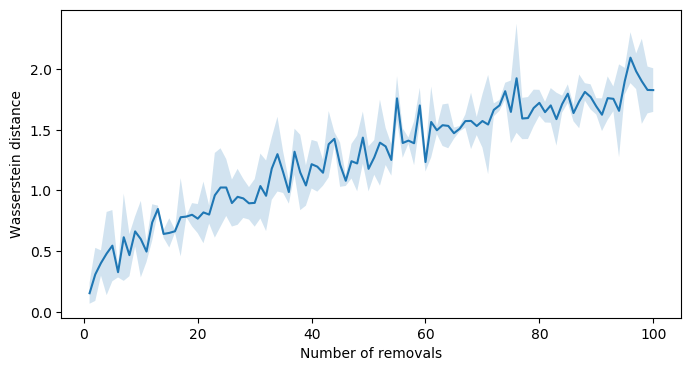

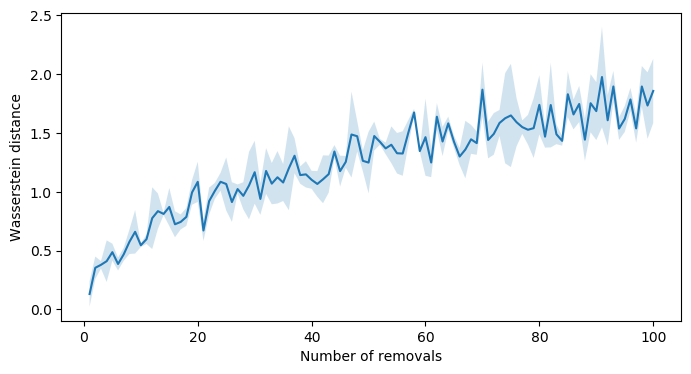

In [155]:
#span
for i in 1:sz
    xs = convert(Array, 1:num_removals)
    lb = collect(Iterators.flatten(convert(Array, smeanarray[i]-sstdarray[i])))
    ub = collect(Iterators.flatten(convert(Array, smeanarray[i]+sstdarray[i])))

    figure(figsize=(8,4))
    plot(1:num_removals, smeanarray[i])
    ax = gca()
    fill_between(xs, lb, ub, alpha=0.2)
    xlabel("Number of removals")
    ylabel("Wasserstein distance")
end

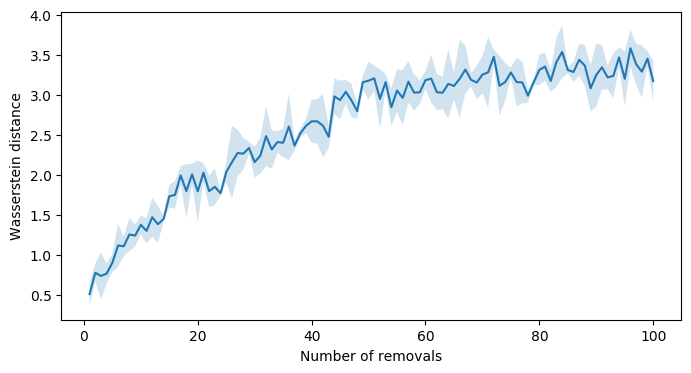

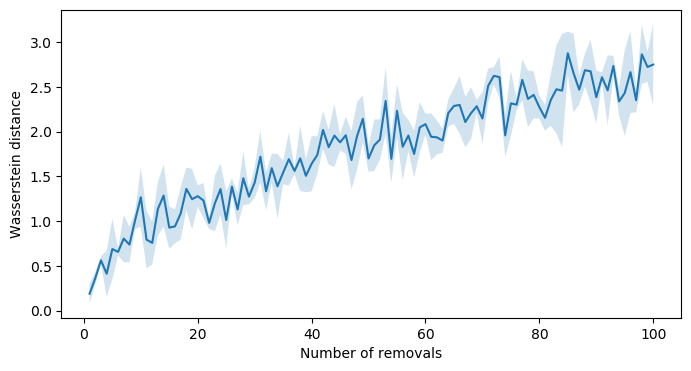

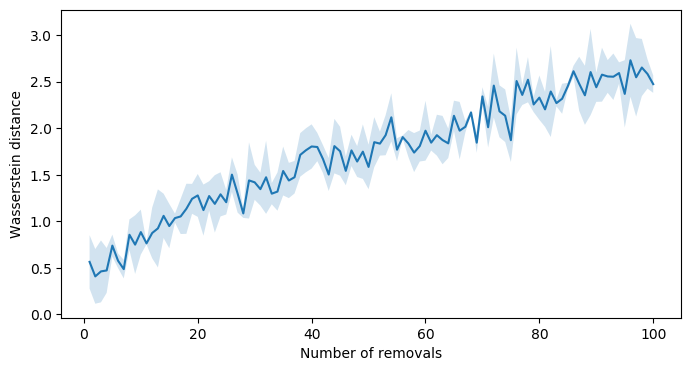

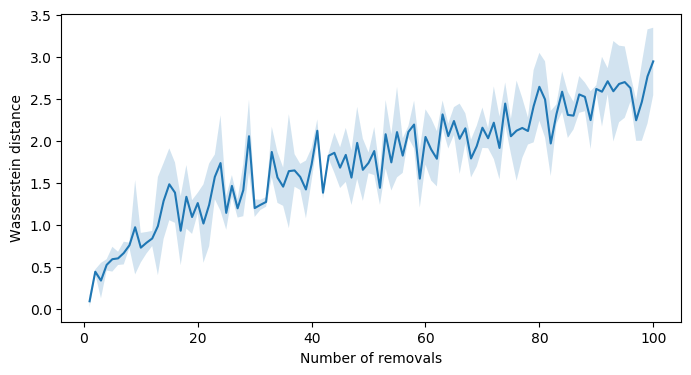

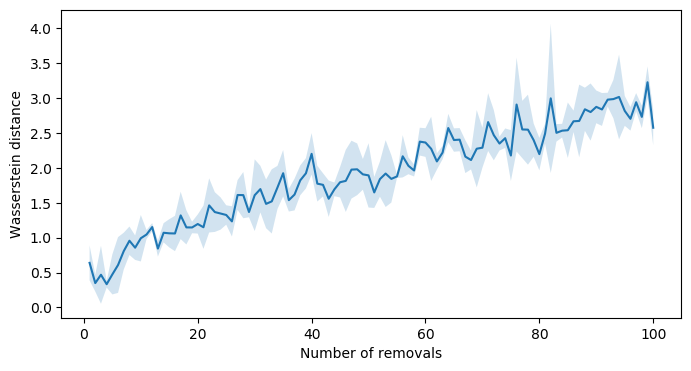

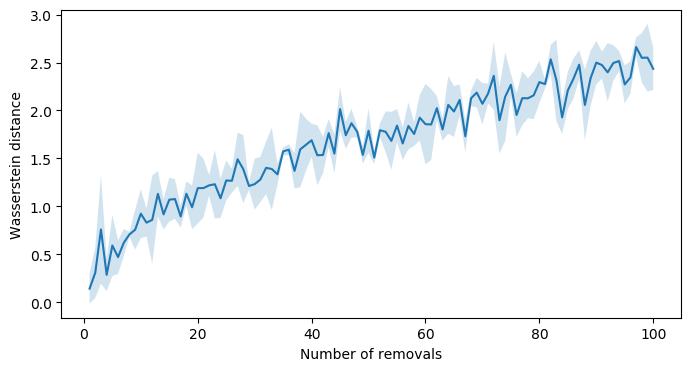

In [156]:
#indiv
for i in 1:sz
    xs = convert(Array, 1:num_removals)
    lb = collect(Iterators.flatten(convert(Array, imeanarray[i]-istdarray[i])))
    ub = collect(Iterators.flatten(convert(Array, imeanarray[i]+istdarray[i])))

    figure(figsize=(8,4))
    plot(1:num_removals, imeanarray[i])
    ax = gca()
    fill_between(xs, lb, ub, alpha=0.2)
    xlabel("Number of removals")
    ylabel("Wasserstein distance")
end

100×1 Array{Float64,2}:
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 ⋮                 
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788
 2.4237334961794788

In [102]:
xs = convert(Array, 1:num_removals)
lb = collect(Iterators.flatten(convert(Array, mean_ws_dist-std_ws_dist)))
ub = collect(Iterators.flatten(convert(Array, mean_ws_dist+std_ws_dist)))

figure(figsize=(8,4))
plot(1:num_removals, mean_ws_dist)
ax = gca()
fill_between(xs, lb, ub, alpha=0.2)
xlabel("Number of removals")
ylabel("Wasserstein distance")

UndefVarError: UndefVarError: mean_ws_dist not defined

(6,)